In [1]:
# Análise de Dados Aplicada à Produção Vegetal
# Rodolfo Souza - rodolfomssouza@gmail.com
# Aula 4 - Análise de regressão

In [2]:
# Diretório de trabalho ---------------------------------------------------
setwd('~/')
setwd('Programming/R/Curso_R_PGPV/')

In [3]:
# Dados -------------------------------------------------------------------
d1 = read.table('GEOR_2016_120_Data.txt', h=T)
head(d1)

X,Y,ThetaS,ThetaAvb,PhiMicro,PhiMeso,PhiMacro,Ds,S0,Ks,Clay,Silt,Sand,CSC,MSC,FSC,idS,Class
436550,9106770,0.33,0.106,62.65,11.56,25.79,1.51,0.3288,0.0052,0.0721,0.2110,0.7169,0.1207,0.1482,0.4480,0.0218,SaLo
436629,9106770,0.35,0.117,56.85,13.35,29.80,1.57,0.4254,0.0075,0.0604,0.1876,0.7520,0.1002,0.0965,0.5553,0.0262,SaLo
436709,9106752,0.48,0.141,80.11,8.22,11.67,1.39,0.2916,0.0018,0.2028,0.3893,0.4079,0.1826,0.0322,0.1931,0.0242,Lo
436790,9106760,0.50,0.124,79.04,7.17,13.79,1.21,0.5414,0.0089,0.2532,0.3258,0.4210,0.3108,0.0140,0.0962,0.0248,Lo
436861,9106760,0.49,0.110,79.09,6.48,14.43,1.35,0.2831,0.0035,0.3203,0.3144,0.3653,0.2923,0.0048,0.0682,0.0196,ClLo
436556,9106676,0.36,0.102,52.34,11.09,36.57,1.57,0.1588,0.0025,0.0669,0.2449,0.6882,0.0652,0.0796,0.5434,0.0244,SaLo


In [4]:
# Análises ----------------------------------------------------------------
# Sumário
summary(d1[3:17])

     ThetaS          ThetaAvb         PhiMicro        PhiMeso      
 Min.   :0.3300   Min.   :0.0580   Min.   :52.34   Min.   : 4.200  
 1st Qu.:0.3950   1st Qu.:0.1070   1st Qu.:65.60   1st Qu.: 6.987  
 Median :0.4600   Median :0.1205   Median :72.52   Median : 8.245  
 Mean   :0.4443   Mean   :0.1215   Mean   :73.16   Mean   : 8.546  
 3rd Qu.:0.4975   3rd Qu.:0.1310   3rd Qu.:79.86   3rd Qu.:10.068  
 Max.   :0.5400   Max.   :0.1930   Max.   :90.07   Max.   :13.350  
    PhiMacro           Ds              S0               Ks          
 Min.   : 4.41   Min.   :1.150   Min.   :0.1584   Min.   :0.001100  
 1st Qu.:12.34   1st Qu.:1.333   1st Qu.:0.2727   1st Qu.:0.002850  
 Median :19.00   Median :1.400   Median :0.3122   Median :0.004750  
 Mean   :18.30   Mean   :1.396   Mean   :0.3827   Mean   :0.005823  
 3rd Qu.:23.89   3rd Qu.:1.450   3rd Qu.:0.4236   3rd Qu.:0.007325  
 Max.   :36.57   Max.   :1.570   Max.   :1.1295   Max.   :0.016800  
      Clay             Silt             S

In [5]:
# Coeficiente de correlação de Pearson
round(cor(d1[3:17]), digits = 2)

,ThetaS,ThetaAvb,PhiMicro,PhiMeso,PhiMacro,Ds,S0,Ks,Clay,Silt,Sand,CSC,MSC,FSC,idS
ThetaS,1.00,0.44,0.55,-0.51,-0.54,-0.75,0.42,0.12,0.44,0.11,-0.40,0.56,-0.58,-0.61,0.26
ThetaAvb,0.44,1.00,0.01,0.29,-0.10,-0.18,-0.16,-0.21,-0.48,0.06,0.33,0.46,-0.10,-0.02,0.85
PhiMicro,0.55,0.01,1.00,-0.89,-0.99,-0.48,0.50,0.07,0.77,0.04,-0.60,0.15,-0.50,-0.52,-0.41
PhiMeso,-0.51,0.29,-0.89,1.00,0.82,0.49,-0.51,-0.24,-0.91,-0.11,0.75,-0.09,0.59,0.57,0.62
PhiMacro,-0.54,-0.10,-0.99,0.82,1.00,0.45,-0.48,-0.03,-0.70,-0.02,0.54,-0.17,0.45,0.48,0.34
Ds,-0.75,-0.18,-0.48,0.49,0.45,1.00,-0.59,-0.44,-0.46,-0.15,0.43,-0.47,0.51,0.59,-0.14
S0,0.42,-0.16,0.50,-0.51,-0.48,-0.59,1.00,0.63,0.50,-0.02,-0.36,0.07,-0.18,-0.33,-0.25
Ks,0.12,-0.21,0.07,-0.24,-0.03,-0.44,0.63,1.00,0.26,0.22,-0.32,-0.02,-0.15,-0.23,-0.16
Clay,0.44,-0.48,0.77,-0.91,-0.70,-0.46,0.50,0.26,1.00,0.14,-0.83,0.11,-0.60,-0.66,-0.69
Silt,0.11,0.06,0.04,-0.11,-0.02,-0.15,-0.02,0.22,0.14,1.00,-0.67,0.07,-0.51,-0.52,0.02


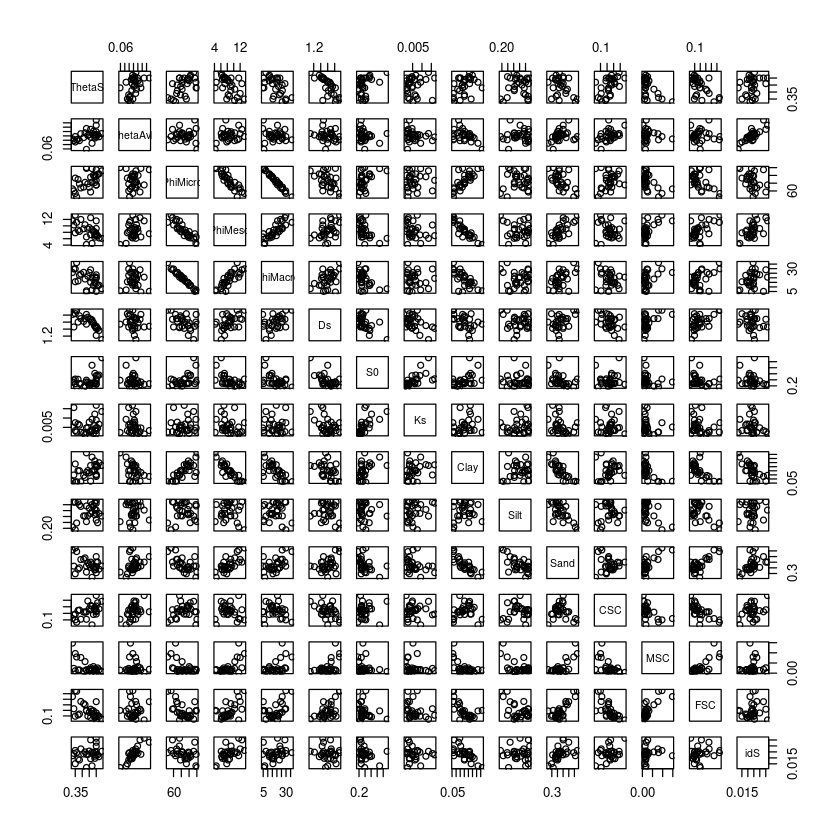

In [6]:
# Gráfica
plot(d1[3:17])

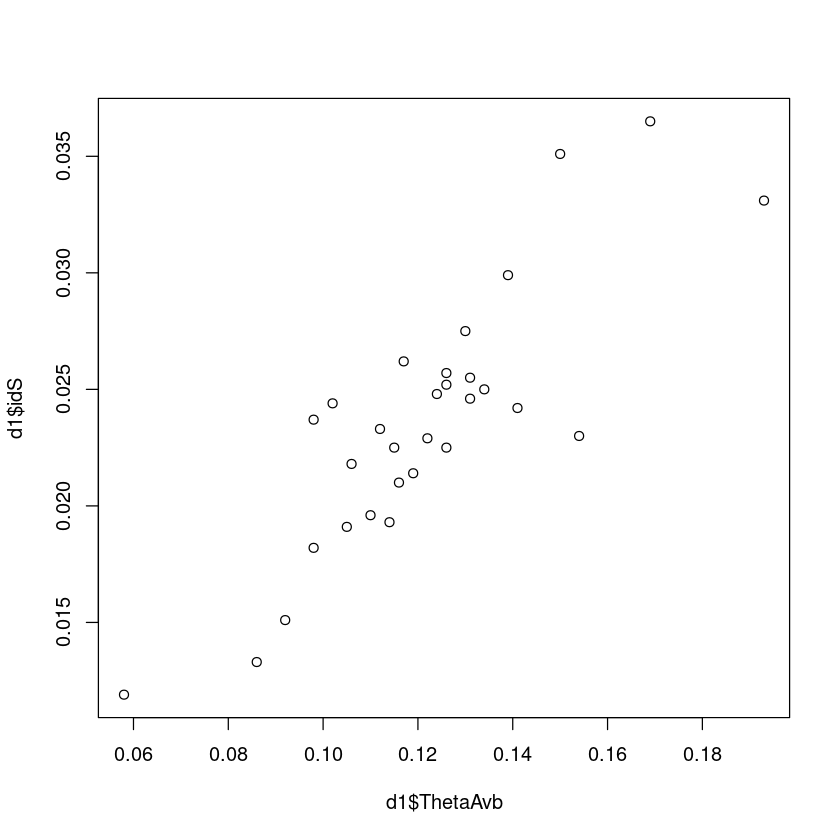

In [7]:
# Regressão simples -------------------------------------------------------
# Regressão 1 ThetaAvb vs idS
plot(d1$ThetaAvb, d1$idS)

In [8]:
# Ajuste da regressão linear
reg1 = lm(idS~ThetaAvb, data=d1)
summary(reg1)

# Extrair coeficientes da regressão
cf1 = coef(reg1); cf1


Call:
lm(formula = idS ~ ThetaAvb, data = d1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0065243 -0.0017989 -0.0003357  0.0014536  0.0063111 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.001213   0.002659   0.456    0.652    
ThetaAvb    0.183842   0.021440   8.575 2.56e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00295 on 28 degrees of freedom
Multiple R-squared:  0.7242,	Adjusted R-squared:  0.7143 
F-statistic: 73.52 on 1 and 28 DF,  p-value: 2.556e-09


(Intercept)    ThetaAvb 
0.001212712 0.183841556

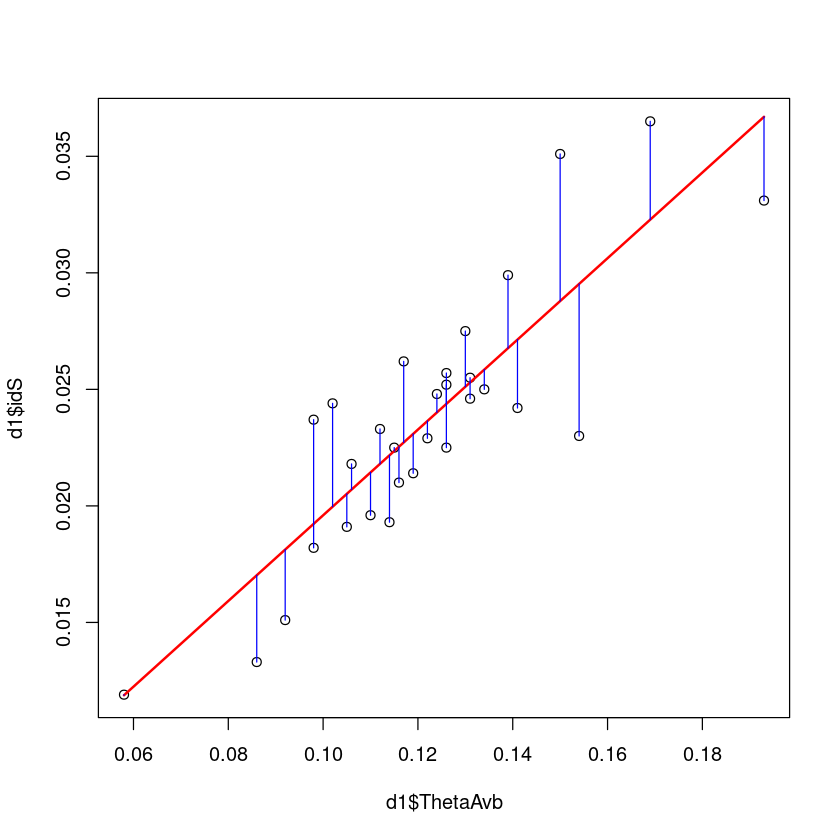

In [9]:
# Adicionar linha de regressão
plot(d1$ThetaAvb, d1$idS)
curve(cf1[1]+cf1[2]*x, add=T, col='red', lwd=2)

# Resíduo
segments(d1$ThetaAvb, d1$idS, d1$ThetaAvb, predict(reg1), col='blue')

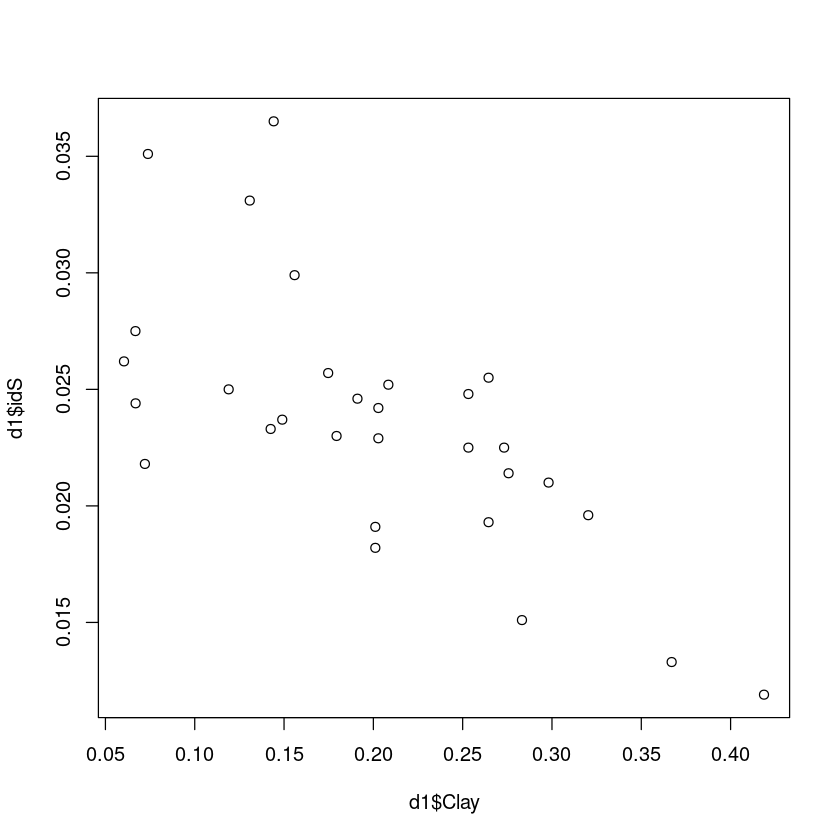

In [10]:
# Regressão 2 - Argila vs idS
plot(d1$Clay, d1$idS)

In [11]:
# Regressão
reg2 = lm(idS~Clay, data=d1)
summary(reg2)

# Extrair coeficientes
cf2 = coef(reg2); cf2


Call:
lm(formula = idS ~ Clay, data = d1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0071054 -0.0026310  0.0000592  0.0018741  0.0106060 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.031917   0.001809  17.639  < 2e-16 ***
Clay        -0.041767   0.008235  -5.072 2.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004056 on 28 degrees of freedom
Multiple R-squared:  0.4788,	Adjusted R-squared:  0.4602 
F-statistic: 25.72 on 1 and 28 DF,  p-value: 2.279e-05


(Intercept)        Clay 
 0.03191680 -0.04176709

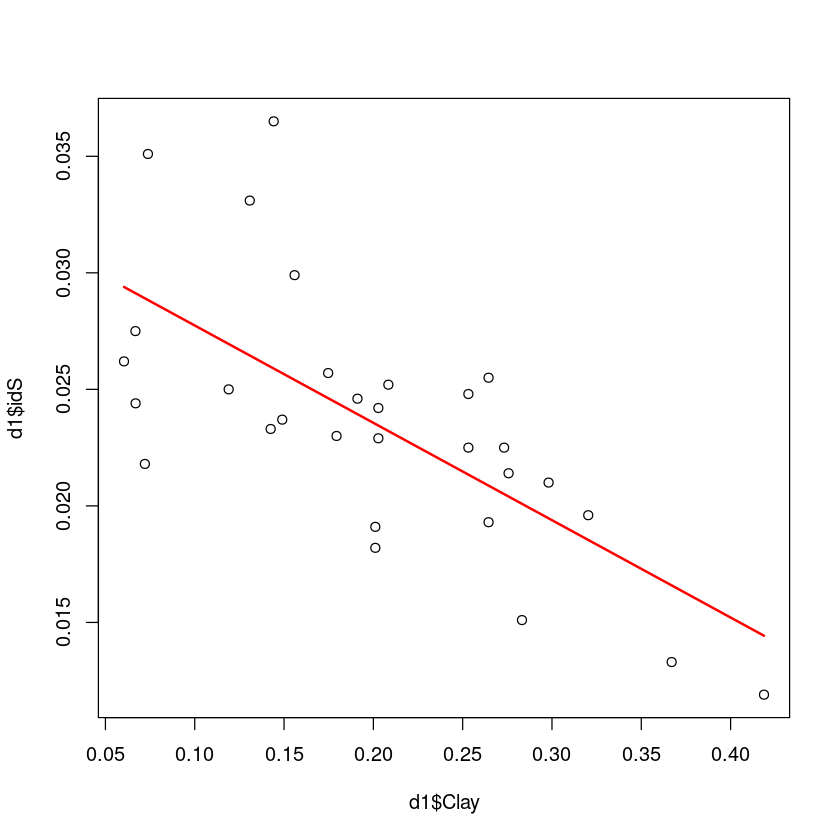

In [12]:
# Adicionar curva regressão
plot(d1$Clay, d1$idS)
curve(cf2[1]+cf2[2]*x, add=T, col='red', lwd=2)

In [13]:
# Exemplo regressão quadrática
reg3 = lm(idS~Clay+I(Clay^2), data=d1)
summary(reg3)

# Coeficientes ajustados
cf3 = coef(reg3); cf3


Call:
lm(formula = idS ~ Clay + I(Clay^2), data = d1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0061800 -0.0021800 -0.0001362  0.0013955  0.0102474 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.027911   0.003257   8.568  3.5e-09 ***
Clay         0.003848   0.032147   0.120    0.906    
I(Clay^2)   -0.106453   0.072619  -1.466    0.154    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003975 on 27 degrees of freedom
Multiple R-squared:  0.5172,	Adjusted R-squared:  0.4815 
F-statistic: 14.46 on 2 and 27 DF,  p-value: 5.375e-05


(Intercept)         Clay    I(Clay^2) 
 0.027911339  0.003847568 -0.106453234

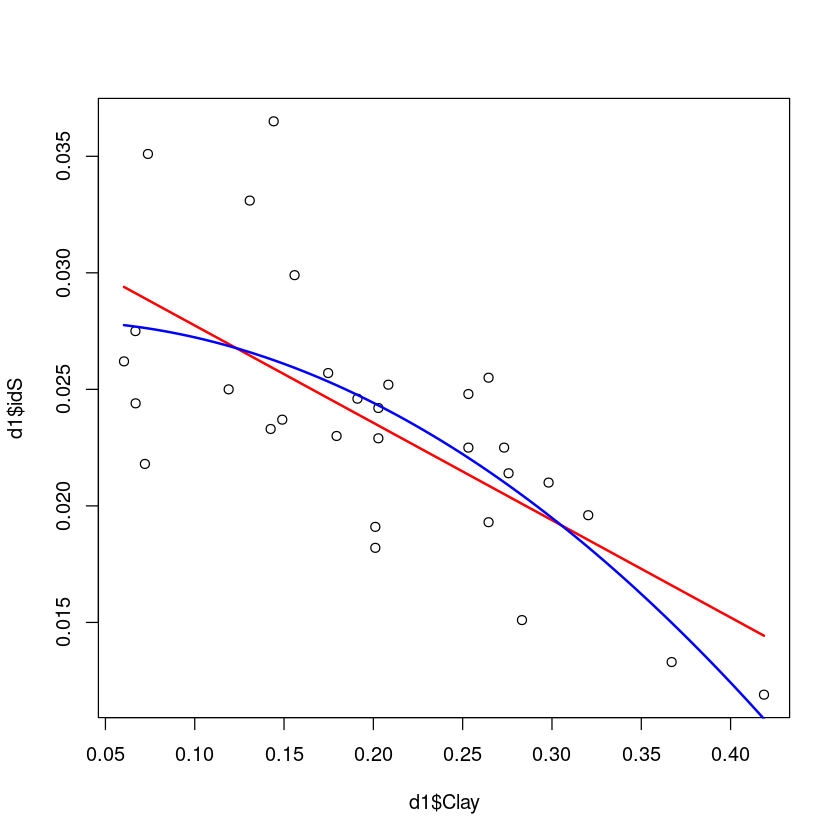

In [14]:
# Adicionar curva regressão
plot(d1$Clay, d1$idS)
curve(cf2[1]+cf2[2]*x, add=T, col='red', lwd=2)
curve(cf3[1]+cf3[2]*x+cf3[3]*x^2, add=T, col='blue', lwd=2)

In [15]:
# Exemplo regressão logarítmica
reg4 = lm(idS~exp(Clay), data=d1)
summary(reg4)

# Coeficientes ajustados
cf4 = coef(reg4); cf4


Call:
lm(formula = idS ~ exp(Clay), data = d1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.006921 -0.002591 -0.000109  0.001750  0.010512 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.065281   0.008041   8.119 7.72e-09 ***
exp(Clay)   -0.034017   0.006526  -5.212 1.55e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.004002 on 28 degrees of freedom
Multiple R-squared:  0.4925,	Adjusted R-squared:  0.4743 
F-statistic: 27.17 on 1 and 28 DF,  p-value: 1.552e-05


(Intercept)   exp(Clay) 
 0.06528146 -0.03401685

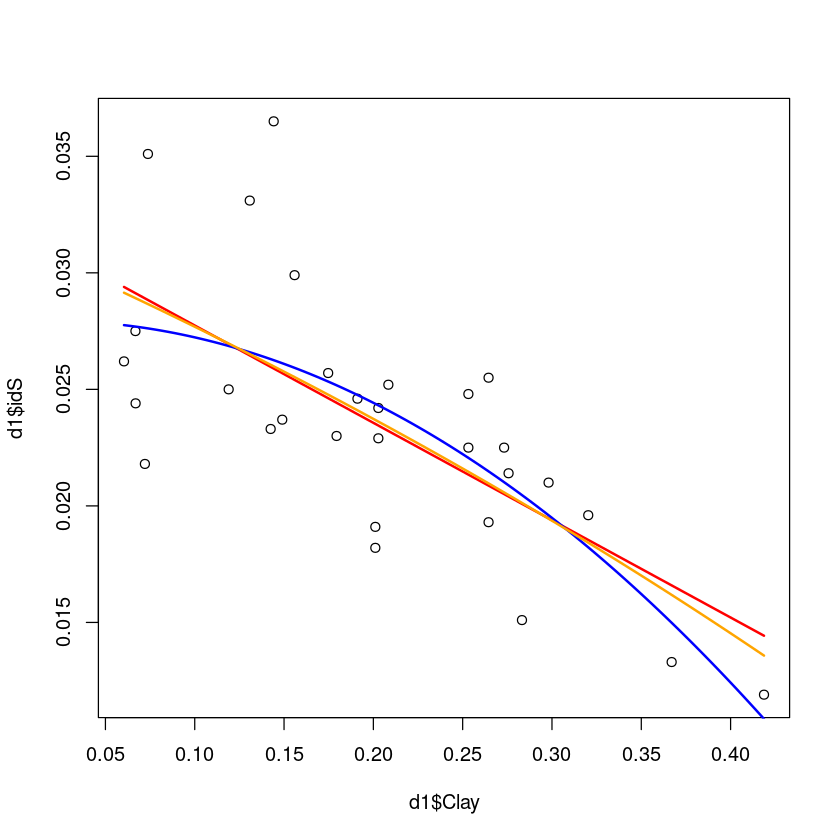

In [16]:
# Adicionar curva regressão
plot(d1$Clay, d1$idS)
curve(cf2[1]+cf2[2]*x, add=T, col='red', lwd=2)
curve(cf3[1]+cf3[2]*x+cf3[3]*x^2, add=T, col='blue', lwd=2)
curve(cf4[1]+cf4[2]*exp(x), add=T, col='orange', lwd=2)

In [17]:
# Regressão múltipla (idS em função de ThetaAvs e Clay)
reg5 = lm(idS~ThetaAvb+Clay, data=d1)
summary(reg5)

# Coeficientes do ajuste
cf5 = coef(reg5); cf5


Call:
lm(formula = idS ~ ThetaAvb + Clay, data = d1)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0057540 -0.0018643 -0.0001315  0.0014362  0.0047741 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.010328   0.003075   3.358 0.002347 ** 
ThetaAvb     0.145683   0.019500   7.471  4.9e-08 ***
Clay        -0.022348   0.005448  -4.102 0.000338 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.002358 on 27 degrees of freedom
Multiple R-squared:  0.8301,	Adjusted R-squared:  0.8175 
F-statistic: 65.95 on 2 and 27 DF,  p-value: 4.058e-11


(Intercept)    ThetaAvb        Clay 
 0.01032793  0.14568338 -0.02234774

In [18]:
# Gerando superfície de resposta
# Criando a função equivalente à regressão múltipla
f = function(x,y){
    return(cf5[1]+cf5[2]*x+cf5[3]*y)
}

In [19]:
# Criando sequências de x e y para estimar "z"
x = seq(0.05, 0.2, length=25)
y = seq(0.05, 0.45, length=25)

# Estimando z
z = outer(x,y,f)

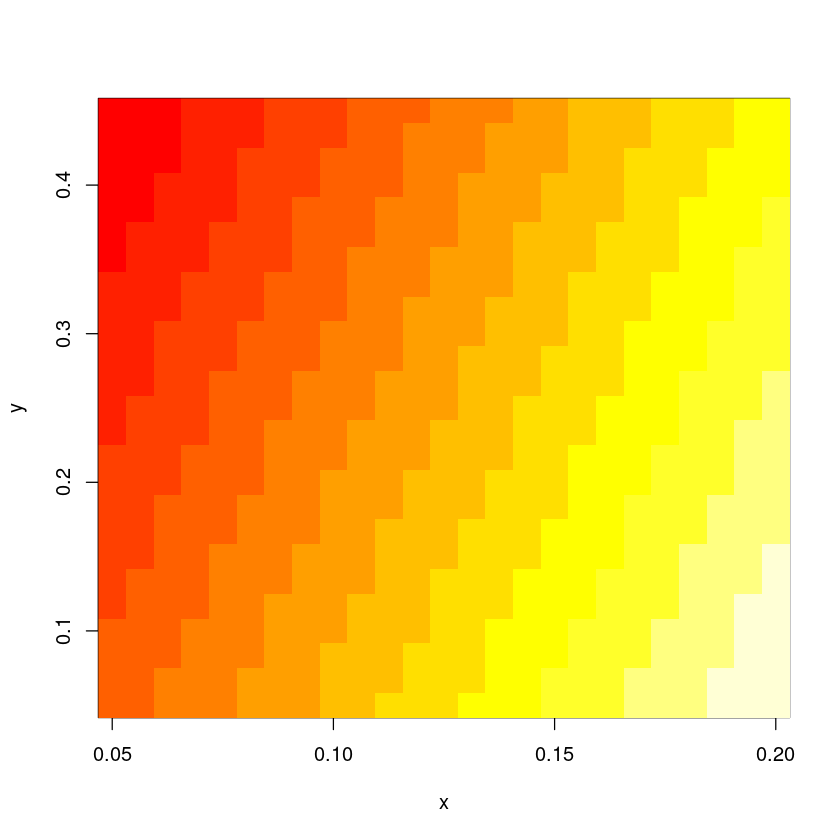

In [20]:
# Gráficos
image(x,y,z)

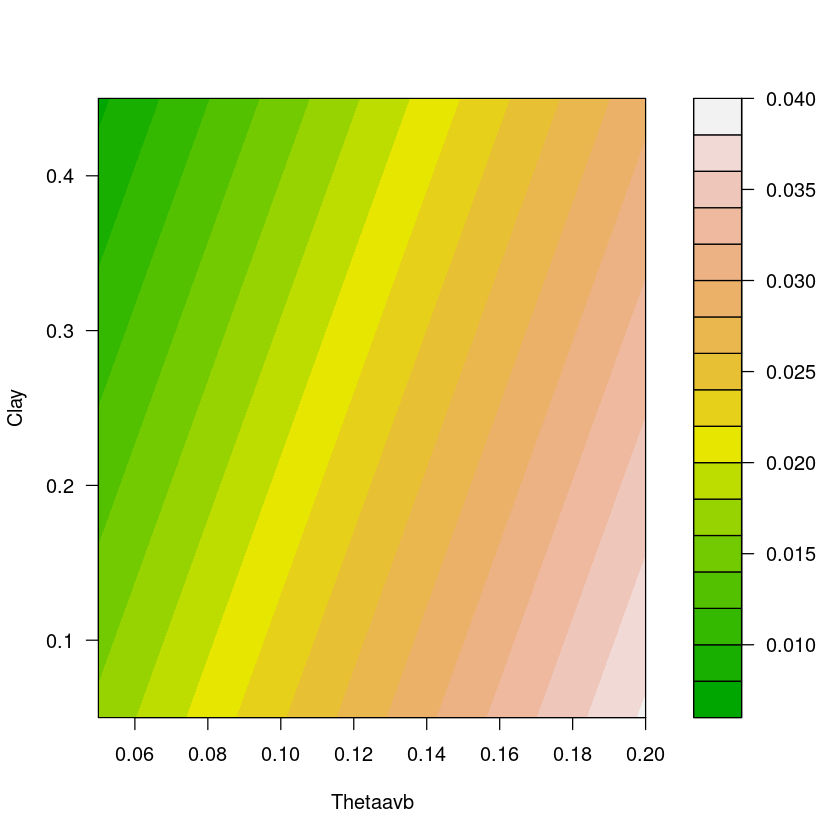

In [21]:
filled.contour(x,y,z, nlevels = 15, col=terrain.colors(17),
                xlab='Thetaavb', ylab='Clay')

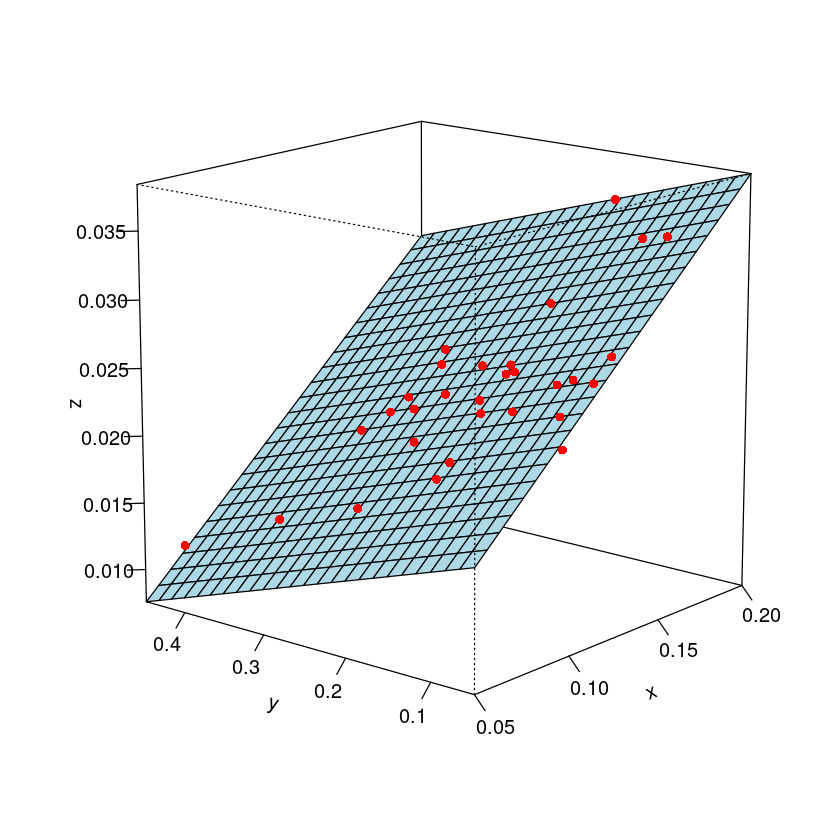

In [22]:
# Gráfico em perspectiva
p1 = persp(x,y,z, col = 'lightblue', theta = 310, phi=15, r=15, ticktype = 'detailed')
mpoints = trans3d(d1$ThetaAvb, d1$Clay, d1$idS, pmat = p1)

# Pontos observados
points(mpoints, pch=16, col='red')